In [1]:
import tensorflow as tf
import sys
sys.path.append('../')
from data_processing.stl10 import get_stl10

In [2]:
visible_devices = tf.config.get_visible_devices()
for devices in visible_devices:
  print(devices)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


Epoch 1/2
2/2 [==============================] - 49s 23s/step - loss: 2.8163
Epoch 2/2
2/2 [==============================] - 58s 28s/step - loss: 2.3235


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


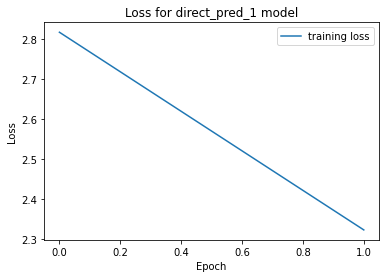

In [4]:
import numpy as np
from models import resnet18 
from models import model 

batch_size = 128
epochs = 2
num_classes = 10 
saved_model_path = 'saved_model'

ds, num_samples = get_stl10('train', batch_size=batch_size)
dp = model.DirectPred(num_classes)
dp.compile()
dp.train(ds, training_samples=320, epochs=epochs, batch_size=batch_size, save_path=saved_model_path)

Epoch 1/2
2/2 [==============================] - 58s 22s/step - loss: 2.1595
Epoch 2/2
2/2 [==============================] - 41s 19s/step - loss: 2.1190


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


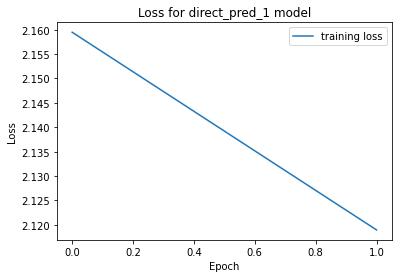

In [5]:
import importlib
importlib.reload(resnet18)
importlib.reload(model)

dp.load_model(saved_model_path)
dp.compile()
dp.train(ds, training_samples=320, epochs=epochs, batch_size=batch_size, save_path='saved_model')

Epoch 1/4
2/2 [==============================] - 35s 15s/step - loss: 1.9477
Epoch 2/4
2/2 [==============================] - 44s 18s/step - loss: 1.9297
Epoch 3/4
2/2 [==============================] - 36s 18s/step - loss: 1.9046
Epoch 4/4
2/2 [==============================] - 38s 18s/step - loss: 1.9263


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


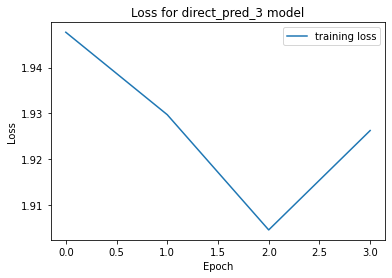

In [7]:
dp = model.DirectPred(num_classes)
dp.load_model(saved_model_path)
dp.compile()
dp.train(ds, training_samples=320, epochs=4, batch_size=batch_size, save_path='saved_model')